<a href="https://colab.research.google.com/github/rajesh0305/Machine_Learning_Assignment/blob/main/PCA_concept_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#PCA:
Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of data while preserving its variance. It transforms original variables into a new set of orthogonal components (principal components), ordered by the amount of variance they capture, simplifying analysis and visualization of complex datasets.

#Loading the DataSet

In [32]:
d0 = pd.read_csv("/content/drive/MyDrive/MNIST digit recognizer/train.csv")

#step1:
Initial visualization of the dataset

In [33]:
print(d0.head(5)) #printing first five row of d0
print(d0.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

**Observtion:**:by seeing the given dataset initially it contains the

1.   Number of rows=42000
2.   Number of columns=785




In [34]:
#save the label into a variable l
l = d0['label']

In [35]:
print(l.head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


**Observation:**:by looking the dataset the data type of the dataset data is (Integer)

#Data Cleaning

In [36]:
#drop the label feature and store the pixels data in d
d = d0.drop("label",axis = 1)

In [37]:
#print(d.head())
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Observation:** After Cleaning of the unwanted columns that is label column so initially we removed it ,whenever we need we can add it further

In [38]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


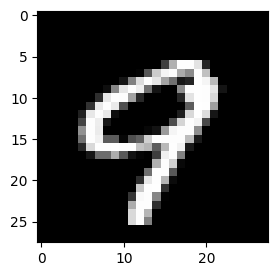

9


In [39]:
#display or plot a number
plt.figure(figsize = (3,3));
idx= 100

#grid_data = d.iloc[idx].as_matrix().reshape(28,28) -->reshaping from 1D to 2D
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation ="none",cmap = "gray")
plt.show()

print(l[idx])

Initially we take some sample of the data from the dataset which is actually the subset of the actual dataset;

1.First PCA_on(15000) dataPoints

In [40]:
#pick first 15K datapoint to work on the time efficiency .
#task:perform the same analysis on all 42 K datapoints
labels = l.head(15000)
data = d.head(15000)
print("the shape of sample data =",data.shape)

the shape of sample data = (15000, 784)


PCA Algorithm contains some steps:

Step1:Data Preprocessing(column standardization)

Step2:Finding Co-Variance Mtrix

Step3:Finding the eigen value and its corresponding eigen vector of the Co-variance matrix

Step4:Initially sort the eigen value list as well as eigen vector list AND
then finding the Top of the list

**Step1:**Preprocessing

Mainly , for the preprocessing we are applying the two method that is


1.   Column Standardization
2.   Mean-variance stabdardization



In [41]:
#data pre-processing: column statnardization of the given data matrix
from sklearn.preprocessing import StandardScaler
standardized_data=  StandardScaler().fit_transform(data)
print(standardized_data.shape)


(15000, 784)


**Step2:** finding Co-variance matrix

In [42]:
#find the co-variance matrix is (S):=(X^T.X)
sample_data =standardized_data;

#matrix multiplication using the numpy method
covar_matrix_S = np.matmul(sample_data.T,sample_data)
print("the shape of covariance matrix =",covar_matrix_S.shape)


the shape of covariance matrix = (784, 784)


Observation:The Dimension of the Co-variance matrix is (d*d)
            where d->features of the dataset;

**Step3**:Finding the eigen-value and its corresponding eigen vector

In [43]:
#finding the top two eigen values and corresponding eigen-vectors
#for projecting onto a 2Dim space

from scipy.linalg import eigh

#the parameter 'eigvals' is defined (low value to high value )
#eigh function will return the eigen values in ascending order
#this code generates only the 2 (782 and 783 ) eigen values
print("Observation:")
values ,vectors = eigh(covar_matrix_S,eigvals=(782,783))
print("shape of eigen vectors = ",vectors.shape)

#cnverting the eigen vectors into (2,d) shape for the easyness of further common operation
vectors  = vectors.T
print("updated shpe of eigen vectors = ",vectors.shape )



Observation:
shape of eigen vectors =  (784, 2)
updated shpe of eigen vectors =  (2, 784)


**Step3**:Now Projecting the top eigen value of its corresponding eigen vector

In [44]:
#projecting the original data sample on the planes
#from by two principle eign vectors by vectors vrctor multiplication

import matplotlib.pyplot as plt
new_coordinates =np.matmul(vectors,sample_data.T)

print("Observation:")
print("resultant new data points shape ",vectors.shape,"x",sample_data.shape,"=",new_coordinates.shape)

Observation:
resultant new data points shape  (2, 784) x (15000, 784) = (2, 15000)


In [45]:
import pandas as pd

#appending label to the d2 projected data
new_coordinates= np.vstack((new_coordinates , labels)).T



In [46]:
#creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data = new_coordinates,columns = ("1st_principal","2nd_principal","labels"))
print(dataframe.head())

   1st_principal  2nd_principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


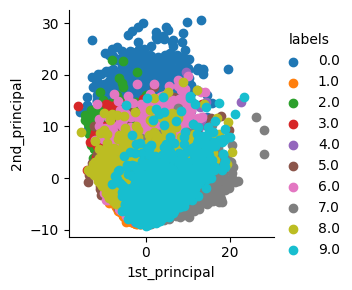

In [47]:
#plotting the 2d data ponts with seaborn
import seaborn as sns
sns.FacetGrid(dataframe,hue = 'labels').map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

**Observation:**By looking the PCA plotting most of the data_point are not seperated to ech other except label(1)

**PCA using SCIKIT-Learn**


In [48]:
#initilizing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [49]:
#configuring the parameters #the number of components = 2
pca.n_components = 2
pca_data=  pca.fit_transform(sample_data)

#pca_reduce will contain the 2d projects of simple data
print("shape of pca_reduced.shape= ", pca_data.shape )

shape of pca_reduced.shape=  (15000, 2)


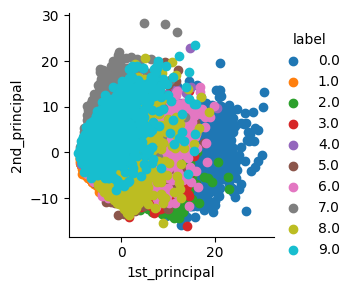

In [50]:
#attaching the labels for each 2d data ponts
pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data = pca_data,columns = ("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue = "label")\
   .map(plt.scatter,'1st_principal','2nd_principal')\
   .add_legend();

plt.show()


PCA for dimensionality reduction (not for visualization)


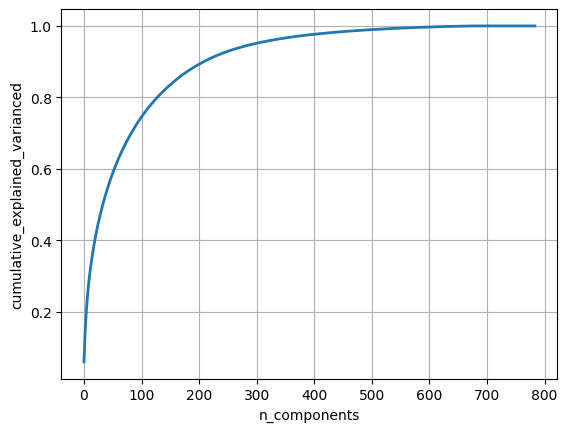

In [51]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_);

cumulative_variance_explained = np.cumsum(percentage_variance_explained)

plt.clf()
plt.plot(cumulative_variance_explained ,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_varianced')
plt.show()

**Now Applying the PCA(data Points=20K)**

the shape of sample data = (20000, 784)
(20000, 784)
the shape of covariance matrix = (784, 784)
shape of pca_reduced.shape=  (20000, 2)


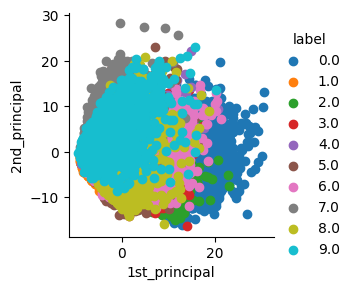

In [55]:
#pick first 20K datapoint to work on the time efficiency .
#task:perform the same analysis on all 42 K datapoints
labels = l.head(20000)
data = d.head(20000)
print("the shape of sample data =",data.shape)

#data pre-processing: column statnardization of the given data matrix
from sklearn.preprocessing import StandardScaler
standardized_data=  StandardScaler().fit_transform(data)
print(standardized_data.shape)

#find the co-variance matrix is (S):=(X^T.X)
sample_data1=standardized_data;
#matrix multiplication using the numpy method
covar_matrix_S = np.matmul(sample_data1.T,sample_data1)
print("the shape of covariance matrix =",covar_matrix_S.shape)

#initilizing the pca
from sklearn import decomposition
pca = decomposition.PCA()

#configuring the parameters #the number of components = 2
pca.n_components = 2
pca_data=  pca.fit_transform(sample_data1)
#pca_reduce will contain the 2d projects of simple data
print("shape of pca_reduced.shape= ", pca_data.shape )

#attaching the labels for each 2d data ponts
pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data = pca_data,columns = ("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue = "label")\
   .map(plt.scatter,'1st_principal','2nd_principal')\
   .add_legend();

plt.show()

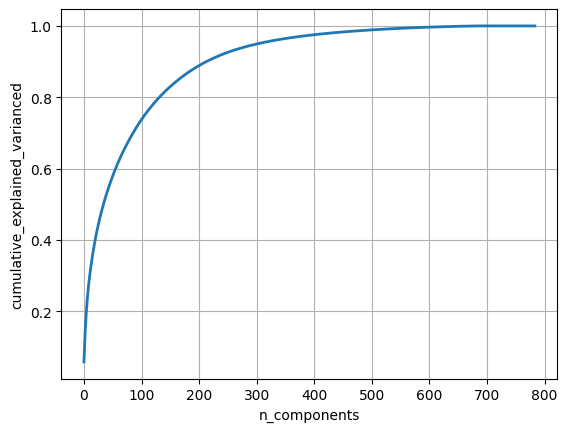

In [56]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data1)

percentage_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_);

cumulative_variance_explained = np.cumsum(percentage_variance_explained)

plt.clf()
plt.plot(cumulative_variance_explained ,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_varianced')
plt.show()

**Observation:**:By Looking the %of Variance Explained or information contains


Formula: %info_contaions=Eigen(i)/Sum of all Eigen(i) {from i->1 ot d}

**Observation:**Here is also not Clear separation of the classes.

the shape of sample data = (30000, 784)
(30000, 784)
the shape of covariance matrix = (784, 784)
shape of pca_reduced.shape=  (30000, 2)


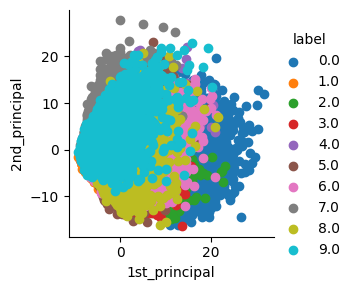

In [58]:
#pick first 30K datapoint to work on the time efficiency .
#task:perform the same analysis on all 42 K datapoints
labels = l.head(30000)
data = d.head(30000)
print("the shape of sample data =",data.shape)

#data pre-processing: column statnardization of the given data matrix
from sklearn.preprocessing import StandardScaler
standardized_data=  StandardScaler().fit_transform(data)
print(standardized_data.shape)

#find the co-variance matrix is (S):=(X^T.X)
sample_data2 =standardized_data;
#matrix multiplication using the numpy method
covar_matrix_S = np.matmul(sample_data2.T,sample_data2)
print("the shape of covariance matrix =",covar_matrix_S.shape)

#initilizing the pca
from sklearn import decomposition
pca = decomposition.PCA()

#configuring the parameters #the number of components = 2
pca.n_components = 2
pca_data=  pca.fit_transform(sample_data2)
#pca_reduce will contain the 2d projects of simple data
print("shape of pca_reduced.shape= ", pca_data.shape )

#attaching the labels for each 2d data ponts
pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data = pca_data,columns = ("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue = "label")\
   .map(plt.scatter,'1st_principal','2nd_principal')\
   .add_legend();

plt.show()

Observation:By looking the above plot we can clearly say that except class0 all other are not seperated properly

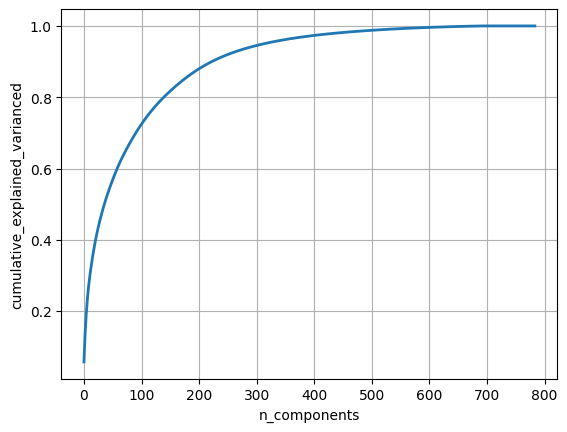

In [59]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data2)

percentage_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_);

cumulative_variance_explained = np.cumsum(percentage_variance_explained)

plt.clf()
plt.plot(cumulative_variance_explained ,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_varianced')
plt.show()

the shape of sample data = (42000, 784)
(42000, 784)
the shape of covariance matrix = (784, 784)
shape of pca_reduced.shape=  (42000, 2)


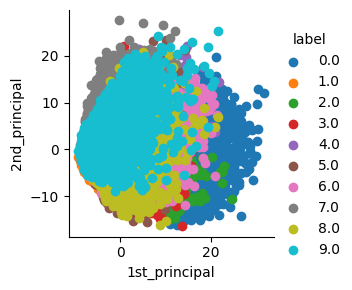

In [60]:
#pick first 42K datapoint to work on the time efficiency .
#task:perform the same analysis on all 42 K datapoints
labels = l.head(420000)
data = d.head(420000)
print("the shape of sample data =",data.shape)

#data pre-processing: column statnardization of the given data matrix
from sklearn.preprocessing import StandardScaler
standardized_data=  StandardScaler().fit_transform(data)
print(standardized_data.shape)

#find the co-variance matrix is (S):=(X^T.X)
sample_data3 =standardized_data;
#matrix multiplication using the numpy method
covar_matrix_S = np.matmul(sample_data3.T,sample_data3)
print("the shape of covariance matrix =",covar_matrix_S.shape)

#initilizing the pca
from sklearn import decomposition
pca = decomposition.PCA()

#configuring the parameters #the number of components = 2
pca.n_components = 2
pca_data=  pca.fit_transform(sample_data3)
#pca_reduce will contain the 2d projects of simple data
print("shape of pca_reduced.shape= ", pca_data.shape )

#attaching the labels for each 2d data ponts
pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data = pca_data,columns = ("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue = "label")\
   .map(plt.scatter,'1st_principal','2nd_principal')\
   .add_legend();

plt.show()

Observation:By looking the above plot except class0 all other are not seperated properly

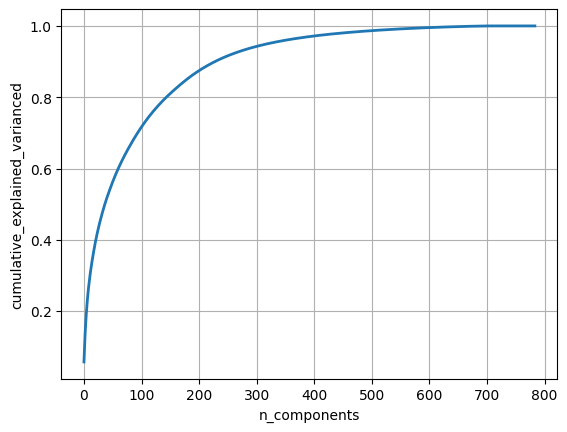

In [61]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data3)

percentage_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_);

cumulative_variance_explained = np.cumsum(percentage_variance_explained)

plt.clf()
plt.plot(cumulative_variance_explained ,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_varianced')
plt.show()

the shape of sample data = (42000, 784)
(42000, 784)
the shape of covariance matrix = (784, 784)
shape of pca_reduced.shape=  (42000, 3)


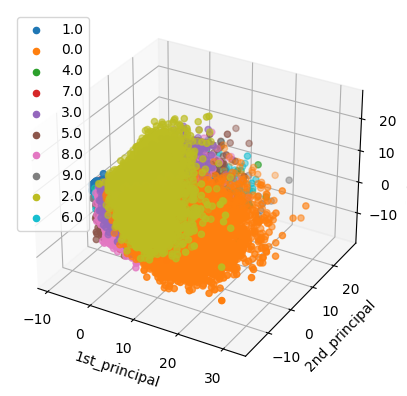

In [63]:
#pick first 42K datapoint to work on the time efficiency .
#task:perform the same analysis on all 42 K datapoints
labels = l.head(420000)
data = d.head(420000)
print("the shape of sample data =",data.shape)

#data pre-processing: column statnardization of the given data matrix
from sklearn.preprocessing import StandardScaler
standardized_data=  StandardScaler().fit_transform(data)
print(standardized_data.shape)

#find the co-variance matrix is (S):=(X^T.X)
sample_data4 =standardized_data;
#matrix multiplication using the numpy method
covar_matrix_S = np.matmul(sample_data4.T,sample_data4)
print("the shape of covariance matrix =",covar_matrix_S.shape)

#initilizing the pca
from sklearn import decomposition
pca = decomposition.PCA()

#configuring the parameters #the number of components = 3
pca.n_components = 3
pca_data=  pca.fit_transform(sample_data4)
#pca_reduce will contain the 2d projects of simple data
print("shape of pca_reduced.shape= ", pca_data.shape )

#attaching the labels for each 2d data ponts
pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data = pca_data,columns = ("1st_principal","2nd_principal","3rd_principal","label"))

# Use Matplotlib for 3D scatter plot instead of Seaborn's FacetGrid
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color coding based on labels
for label in pca_df['label'].unique():
    subset = pca_df[pca_df['label'] == label]
    ax.scatter(subset['1st_principal'], subset['2nd_principal'], subset['3rd_principal'], label=label)

ax.set_xlabel('1st_principal')
ax.set_ylabel('2nd_principal')
ax.set_zlabel('3rd_principal')
ax.legend()

plt.show()

**Observation:**:By looking the Above 3-Component PCA Only Class2 and Class0 might be seperated from the otehrs otherwise all other are not seperated from each otehr

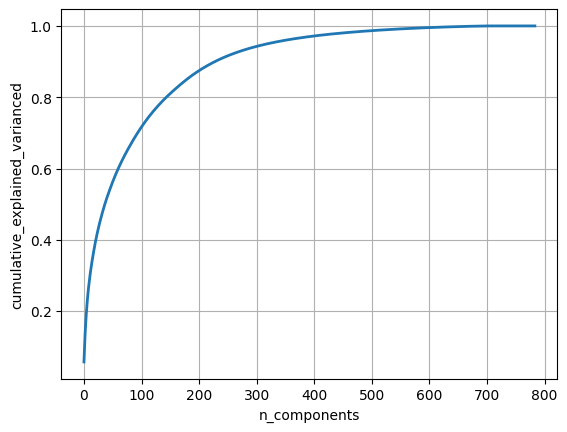

In [64]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data4)

percentage_variance_explained = pca.explained_variance_/np.sum(pca.explained_variance_);

cumulative_variance_explained = np.cumsum(percentage_variance_explained)

plt.clf()
plt.plot(cumulative_variance_explained ,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_varianced')
plt.show()